# Tutorial: Validation, regularization and callbacks

In [69]:
import tensorflow as tf

## Standard model

### Load data

In [70]:
from sklearn.datasets import load_diabetes

diabetes_dataset = load_diabetes()

print(diabetes_dataset['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

In [71]:
print(diabetes_dataset.keys())

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])


In [72]:
data = diabetes_dataset['data']
targets = diabetes_dataset['target']

In [73]:
print(data.shape)
print(targets.shape)

(442, 10)
(442,)


In [74]:
data

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [75]:
targets

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

### Preprocess data

#### Normalize

In [76]:
print(f'targets mean: {targets.mean(axis=0)}')
print(f'targets standard deviation: {targets.std()}')

# Normalize target data (this will make clearer training curves)
targets = (targets - targets.mean(axis=0)) / targets.std()

targets

targets mean: 152.13348416289594
targets standard deviation: 77.00574586945044


array([-1.47194752e-02, -1.00165882e+00, -1.44579915e-01,  6.99512942e-01,
       -2.22496178e-01, -7.15965848e-01, -1.83538046e-01, -1.15749134e+00,
       -5.47147277e-01,  2.05006151e+00, -6.64021672e-01, -1.07957508e+00,
        3.48889755e-01,  4.26806019e-01, -4.43258925e-01,  2.45001404e-01,
        1.80071184e-01, -1.05621783e-01, -7.15965848e-01,  2.06043272e-01,
       -1.09256112e+00, -1.33929596e+00, -1.09256112e+00,  1.20596866e+00,
        4.13819975e-01,  6.47568766e-01, -1.96524090e-01, -8.71798376e-01,
       -2.74440354e-01,  1.69943833e+00, -3.00412442e-01, -1.20943552e+00,
        2.45262887e+00, -8.45826288e-01, -1.13151925e+00, -6.51035629e-01,
        1.46568953e+00,  1.60853602e+00,  1.29687096e+00, -8.06868156e-01,
       -6.77007716e-01, -1.26137969e+00, -1.18346343e+00, -7.80896068e-01,
        1.38777327e+00, -1.28735178e+00,  4.91736239e-01, -1.31593871e-01,
       -1.00165882e+00, -1.31593871e-01,  3.72247006e-02,  9.46247777e-01,
       -1.20943552e+00, -

#### Split into train / test sets

In [77]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_targets, test_targets = train_test_split(data, targets, test_size=0.1)

print(train_data.shape, train_targets.shape)
print(test_data.shape, test_targets.shape)

(397, 10) (397,)
(45, 10) (45,)


### Build model

In [78]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def get_model():
    model = Sequential([
        Dense(128, activation='relu', input_shape=(train_data.shape[1], )),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(1)
    ])
    return model

model = get_model()

model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_105 (Dense)            (None, 128)               1408      
_________________________________________________________________
dense_106 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_107 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_108 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_109 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_110 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_111 (Dense)            (None, 1)               

In [79]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

### Train model

In [80]:
history = model.fit(train_data, train_targets, epochs=100, validation_split=0.15, batch_size=64, verbose=False)

### Evaluate model

In [81]:
model.evaluate(test_data, test_targets, verbose=2)

2/2 - 0s - loss: 1.1742 - mae: 0.8692


[1.1742464303970337, 0.8692299723625183]

### Plot learning

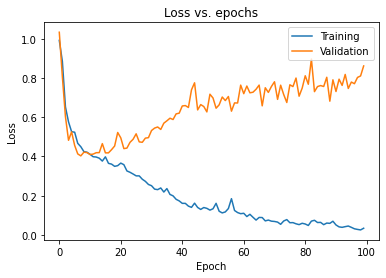

In [82]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

## Regularized model

### Build model

In [83]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers

def get_regularized_model(wd, rate):
    model = Sequential([
        Dense(128, kernel_regularizer=regularizers.l2(wd), activation='relu', input_shape=(train_data.shape[1], )),
        Dropout(rate),
        Dense(128, kernel_regularizer=regularizers.l2(wd), activation='relu'),
        Dropout(rate),
        Dense(128, kernel_regularizer=regularizers.l2(wd), activation='relu'),
        Dropout(rate),
        Dense(128, kernel_regularizer=regularizers.l2(wd), activation='relu'),
        Dropout(rate),
        Dense(128, kernel_regularizer=regularizers.l2(wd), activation='relu'),
        Dropout(rate),
        Dense(128, kernel_regularizer=regularizers.l2(wd), activation='relu'),
        Dropout(rate),
        Dense(1)
    ])
    return model

model = get_regularized_model(1e-5, 0.3)

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

### Train model

In [84]:
history = model.fit(train_data, train_targets, epochs=100, validation_split=0.15, batch_size=64, verbose=False)

### Evaluate model

In [85]:
model.evaluate(test_data, test_targets, verbose=2)

2/2 - 0s - loss: 0.9317 - mae: 0.7663


[0.9316982626914978, 0.7662957310676575]

### Plot learning

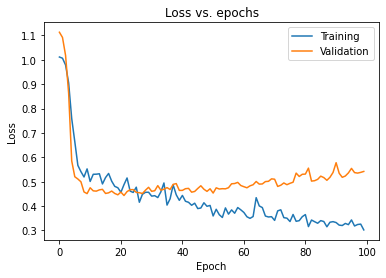

In [86]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

## Callbacks

In [87]:
from tensorflow.keras.callbacks import Callback

### Training callback

In [88]:
class TrainingCallback(Callback):
    def on_train_begin(self, logs=None):
        print('🤖 Starting training...')

    def on_epoch_begin(self, epoch, logs=None):
        print(f'⏰ Starting training epoch {epoch}')

    def on_train_batch_begin(self, batch, logs=None):
        print(f'📦 Starting training batch {batch}')

    def on_train_batch_end(self, batch, logs=None):
        print(f'📦 Finished training batch {batch}')

    def on_epoch_end(self, epoch, logs=None):
        print(f'⏰ Finished training epoch {epoch}')

    def on_train_end(self, logs=None):
        print('🤖 Finished training!')

### Testing callback

In [89]:
class TestingCallback(Callback):
    def on_test_begin(self, logs=None):
        print('❓Starting testing...')

    def on_test_batch_begin(self, batch, logs=None):
        print(f'📦 Starting testing batch {batch}')

    def on_test_batch_end(self, batch, logs=None):
        print(f'📦 Finished testing batch {batch}')

    def on_test_end(self, logs=None):
        print('❓Finished testing!')

### Prediction callback

In [90]:
class PredictionCallback(Callback):
    def on_predict_begin(self, logs=None):
        print('🔮 Starting prediction...')

    def on_predict_batch_begin(self, batch, logs=None):
        print(f'📦 Starting prediction batch {batch}')

    def on_predict_batch_end(self, batch, logs=None):
        print(f'📦 Finished prediction batch {batch}')

    def on_predict_end(self, logs=None):
        print('🔮 Finished prediction!')

In [91]:
model = get_regularized_model(1e-5, 0.3)

model.compile(optimizer='adam', loss='mse')

model.fit(train_data, train_targets, epochs=3, batch_size=128, verbose=False, callbacks=[TrainingCallback()])

🤖 Starting training...
⏰ Starting training epoch 0
📦 Starting training batch 0
📦 Finished training batch 0
📦 Starting training batch 1
📦 Finished training batch 1
📦 Starting training batch 2
📦 Finished training batch 2
📦 Starting training batch 3
📦 Finished training batch 3
⏰ Finished training epoch 0
⏰ Starting training epoch 1
📦 Starting training batch 0
📦 Finished training batch 0
📦 Starting training batch 1
📦 Finished training batch 1
📦 Starting training batch 2
📦 Finished training batch 2
📦 Starting training batch 3
📦 Finished training batch 3
⏰ Finished training epoch 1
⏰ Starting training epoch 2
📦 Starting training batch 0
📦 Finished training batch 0
📦 Starting training batch 1
📦 Finished training batch 1
📦 Starting training batch 2
📦 Finished training batch 2
📦 Starting training batch 3
📦 Finished training batch 3
⏰ Finished training epoch 2
🤖 Finished training!


In [92]:
model.evaluate(test_data, test_targets, verbose=False, callbacks=[TestingCallback()])

❓Starting testing...
📦 Starting testing batch 0
📦 Finished testing batch 0
📦 Starting testing batch 1
📦 Finished testing batch 1
❓Finished testing!


0.7882320880889893

In [93]:
model.predict(test_data, verbose=False, callbacks=[PredictionCallback()])

🔮 Starting prediction...
📦 Starting prediction batch 0
📦 Finished prediction batch 0
📦 Starting prediction batch 1
📦 Finished prediction batch 1
🔮 Finished prediction!


array([[ 0.0476389 ],
       [ 0.01940136],
       [ 0.024346  ],
       [-0.00510283],
       [-0.01757799],
       [ 0.04164376],
       [-0.00362254],
       [ 0.01711103],
       [ 0.03993547],
       [-0.00423124],
       [ 0.00538639],
       [ 0.00349376],
       [-0.01581293],
       [ 0.03958826],
       [ 0.00937463],
       [-0.0215228 ],
       [-0.020356  ],
       [ 0.02608263],
       [-0.00846187],
       [-0.02267825],
       [-0.01882888],
       [ 0.00733343],
       [ 0.04164094],
       [ 0.01433228],
       [-0.020243  ],
       [ 0.06235658],
       [-0.02614456],
       [ 0.03894471],
       [ 0.05978216],
       [ 0.03838132],
       [-0.00517604],
       [ 0.00290029],
       [-0.02256625],
       [-0.01978274],
       [ 0.02946185],
       [ 0.03127217],
       [-0.0181932 ],
       [-0.00325187],
       [-0.01990281],
       [ 0.06856067],
       [-0.02342534],
       [ 0.02948688],
       [ 0.02016102],
       [ 0.03720749],
       [ 0.02001264]], dtype=flo

## Early stopping

### Unregularized model

In [94]:
unregularized_model = get_model()

unregularized_model.compile(optimizer='adam', loss='mse')

unregularized_history = unregularized_model.fit(
    train_data, 
    train_targets, 
    epochs=100, 
    validation_split=0.15, 
    batch_size=64, 
    verbose=False, 
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=2)]
)

unregularized_model.evaluate(test_data, test_targets)

2/2 [==============================] - 0s 1ms/step - loss: 0.7387


0.7386766076087952

### Regularized model

In [95]:
regularized_model = get_regularized_model(1e-8, 0.2)

regularized_model.compile(optimizer='adam', loss='mse')

regularized_history = regularized_model.fit(
    train_data, 
    train_targets, 
    epochs=100, 
    validation_split=0.15, 
    batch_size=64, 
    verbose=False, 
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=2)]
)

regularized_model.evaluate(test_data, test_targets)

2/2 [==============================] - 0s 824us/step - loss: 0.7672


0.7671676874160767

### Plot learning comparison

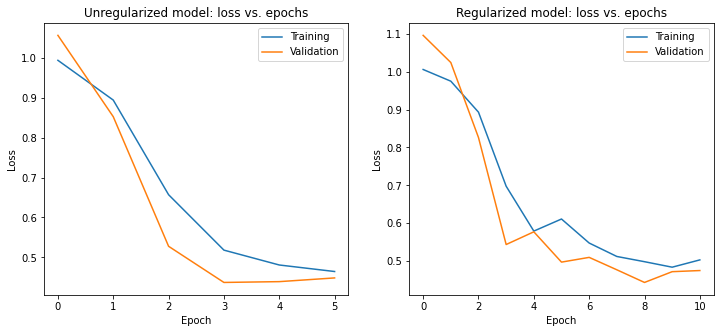

In [96]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 5))

fig.add_subplot(121)

plt.plot(unregularized_history.history['loss'])
plt.plot(unregularized_history.history['val_loss'])
plt.title('Unregularized model: loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

fig.add_subplot(122)

plt.plot(regularized_history.history['loss'])
plt.plot(regularized_history.history['val_loss'])
plt.title('Regularized model: loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

plt.show()